<a href="https://colab.research.google.com/github/eziokittu/OpiniAnalyzer/blob/main/TTL_GooglePlayReviews_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

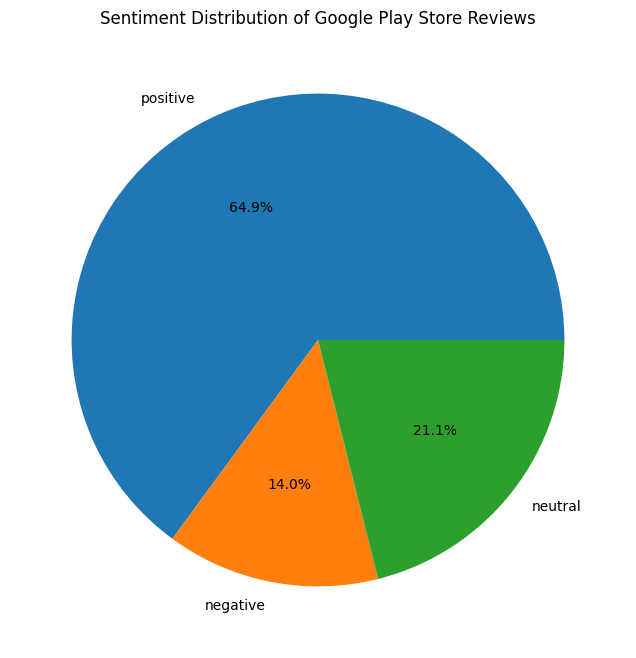

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Load data from CSV
df = pd.read_csv('dataset_reviews_2.csv')  # Replace 'your_file_path.csv' with the path to your CSV file

# Extract relevant columns and rows (from 10th to 20th)
relevant_data = df[['content', 'thumbsUpCount']].iloc[0:50000]

# Function to perform sentiment analysis
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Classify the polarity into positive, negative, and neutral
    if analysis.sentiment.polarity > 0.05:
        return 'positive'
    elif analysis.sentiment.polarity < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the review content
relevant_data['sentiment'] = relevant_data['content'].apply(analyze_sentiment)

# Initialize counters for each sentiment
sentiment_counts = {'positive': 0, 'negative': 0, 'neutral': 0}

# Aggregate thumbsUpCount based on sentiment
for index, row in relevant_data.iterrows():
    sentiment_counts[row['sentiment']] += row['thumbsUpCount']

# Convert counts to percentages
total_counts = sum(sentiment_counts.values())
for sentiment in sentiment_counts:
    sentiment_counts[sentiment] = (sentiment_counts[sentiment] / total_counts) * 100 if total_counts > 0 else 0

# Draw pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts.values(), labels=sentiment_counts.keys(), autopct='%1.1f%%')
plt.title('Sentiment Distribution of Google Play Store Reviews')
plt.show()